In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics
from sklearn.metrics import accuracy_score

In [180]:
names = ['Date','Time','Measurement','Value']
df = pd.read_csv('Diabetes-Data/data-33', sep='\t', header=None, names=names)
df

,Date,Time,Measurement,Value
0,07-31-1990,18:28,34,1
1,07-31-1990,22:49,63,320
2,07-31-1990,22:51,71,0
3,07-31-1990,22:51,33,3
4,07-31-1990,22:51,34,7
...,...,...,...,...
295,08-29-1990,07:03,33,6
296,08-29-1990,12:39,60,159
297,08-29-1990,12:42,33,5
298,08-29-1990,18:10,62,92


In [181]:
arr_triplets = []

m = []
for index, row in enumerate(df.iterrows()):
    if(row[1]['Measurement'] >= 58 and row[1]['Measurement'] <= 64):
        if(len(m) < 3):
            m.append(row[1]['Value'])
        else:
            arr_triplets.append({'m1':m[0], 'm2':m[1], 'm3':m[2], 'Symptoms':False })
            m.append(row[1]['Value'])
            m.pop(0)
            print(str(len(m)))
    elif(row[1]['Measurement'] == 65 and len(m) == 3):
        print("Symptom")
        arr_triplets.append({'m1':m[0], 'm2':m[1], 'm3':m[2], 'Symptoms':True})
            

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
Symptom
3
3
Symptom
3
3
3
Symptom
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
Symptom
3
3
3
3
3
3
Symptom
3
3
3
3
3
3
3
3
3
3
3
Symptom
3
Symptom
Symptom
3
3
3
3
3
3
3
Symptom
3
3
3
3
3
3
Symptom
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


In [182]:
arr_hg_sym = []

m = []
for index, row in enumerate(df.iterrows()): 
    if index == 0:
        arr_hg_sym.append({"Date":row[1]["Date"]})
        arr_hg_sym[len(arr_hg_sym)-1]["HypoSymptoms"] = False
    elif(row[1]["Date"] != arr_hg_sym[len(arr_hg_sym)-1]["Date"]):
        arr_hg_sym.append({"Date":row[1]["Date"]})
        arr_hg_sym[len(arr_hg_sym)-1]["HypoSymptoms"] = False
        
    if(row[1]['Measurement'] >= 58 and row[1]['Measurement'] <= 64):
        m.append(row[1]['Value'])
        if(len(m) > 3):
            m.pop(0)
    
    if (row[1]['Measurement'] == 65):
        arr_hg_sym[len(arr_hg_sym)-1]["HypoSymptoms"] = True
        arr_hg_sym[len(arr_hg_sym)-1]["HypoSymptomsTime"] = row[1]['Time']
        
        if(len(m) == 3):
            arr_hg_sym[len(arr_hg_sym)-1]["m1"] = m[0]
            arr_hg_sym[len(arr_hg_sym)-1]["m2"] = m[1]
            arr_hg_sym[len(arr_hg_sym)-1]["m3"] = m[2]
#combinar tabla de presencia de síntomas por día con tabla de los últimos 3 niveles de glucosa(desayuno, comida, cena)

In [183]:
arr_dates = []

for index, row in enumerate(df.iterrows()): 
    if index == 0:
        arr_dates.append({"Date":row[1]["Date"]})
        arr_dates[len(arr_dates)-1]["HypoSymptoms"] = False
        arr_dates[len(arr_dates)-1]["PreBreakfast"] = 0
        arr_dates[len(arr_dates)-1]["PostBreakfast"] = 0
        arr_dates[len(arr_dates)-1]["PreLunch"] = 0
        arr_dates[len(arr_dates)-1]["PostLunch"] = 0
        arr_dates[len(arr_dates)-1]["PreSupper"] = 0
        arr_dates[len(arr_dates)-1]["PostSupper"] = 0
        arr_dates[len(arr_dates)-1]["PreSnack"] = 0
    elif(row[1]["Date"] != arr_dates[len(arr_dates)-1]["Date"]):
        arr_dates.append({"Date":row[1]["Date"]})
        arr_dates[len(arr_dates)-1]["HypoSymptoms"] = False
        arr_dates[len(arr_dates)-1]["PreBreakfast"] = 0
        arr_dates[len(arr_dates)-1]["PostBreakfast"] = 0
        arr_dates[len(arr_dates)-1]["PreLunch"] = 0
        arr_dates[len(arr_dates)-1]["PostLunch"] = 0
        arr_dates[len(arr_dates)-1]["PreSupper"] = 0
        arr_dates[len(arr_dates)-1]["PostSupper"] = 0
        arr_dates[len(arr_dates)-1]["PreSnack"] = 0
    
    if (row[1]['Measurement'] == 58):
        arr_dates[len(arr_dates)-1]["PreBreakfast"] = row[1]['Value']
    elif (row[1]['Measurement'] == 59):
        arr_dates[len(arr_dates)-1]["PostBreakfast"] = row[1]['Value']
    elif (row[1]['Measurement'] == 60):
        arr_dates[len(arr_dates)-1]["PreLunch"] = row[1]['Value']
    elif (row[1]['Measurement'] == 61):
        arr_dates[len(arr_dates)-1]["PostLunch"] = row[1]['Value']
    elif (row[1]['Measurement'] == 62):
        arr_dates[len(arr_dates)-1]["PreSupper"] = row[1]['Value']
    elif (row[1]['Measurement'] == 63):
        arr_dates[len(arr_dates)-1]["PostSupper"] = row[1]['Value']
    elif (row[1]['Measurement'] == 64):
        arr_dates[len(arr_dates)-1]["PreSnack"] = row[1]['Value']
    elif (row[1]['Measurement'] == 65):
        arr_dates[len(arr_dates)-1]["HypoSymptoms"] = True

In [184]:
df_hg = pd.DataFrame(arr_dates)
df_hg

,Date,HypoSymptoms,PreBreakfast,PostBreakfast,PreLunch,PostLunch,PreSupper,PostSupper,PreSnack
0,07-31-1990,False,0,0,0,0,0,320,0
1,08-01-1990,False,80,0,72,0,92,0,86
2,08-02-1990,False,284,0,84,0,230,0,54
3,08-03-1990,False,222,0,84,0,86,0,0
4,08-04-1990,False,178,0,210,0,254,148,0
5,08-05-1990,False,173,0,197,0,203,0,45
6,08-06-1990,False,151,0,103,0,211,0,83
7,08-07-1990,False,89,0,60,0,259,0,197
8,08-08-1990,True,213,0,101,0,193,0,61
9,08-09-1990,True,84,0,58,0,109,0,247


In [185]:
df_hg2 = pd.DataFrame(arr_hg_sym)
df_hg2

,Date,HypoSymptoms,HypoSymptomsTime,m1,m2,m3
0,07-31-1990,False,NaN,NaN,NaN,NaN
1,08-01-1990,False,NaN,NaN,NaN,NaN
2,08-02-1990,False,NaN,NaN,NaN,NaN
3,08-03-1990,False,NaN,NaN,NaN,NaN
4,08-04-1990,False,NaN,NaN,NaN,NaN
5,08-05-1990,False,NaN,NaN,NaN,NaN
6,08-06-1990,False,NaN,NaN,NaN,NaN
7,08-07-1990,False,NaN,NaN,NaN,NaN
8,08-08-1990,True,22:37,101.0,193.0,61.0
9,08-09-1990,True,12:34,61.0,84.0,58.0


In [186]:
df_hg3 = pd.DataFrame(arr_triplets)
df_hg3

,m1,m2,m3,Symptoms
0,320,80,72,False
1,80,72,92,False
2,72,92,86,False
3,92,86,284,False
4,86,284,84,False
...,...,...,...,...
115,214,160,184,False
116,160,184,77,False
117,184,77,135,False
118,77,135,115,False


<function matplotlib.pyplot.show(*args, **kw)>

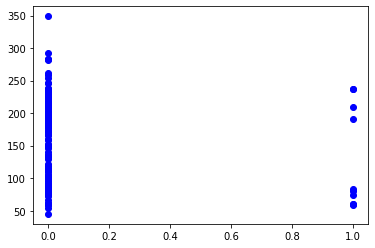

In [187]:
plt.plot(df_hg3['Symptoms'], df_hg3['m3'], 'bo')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

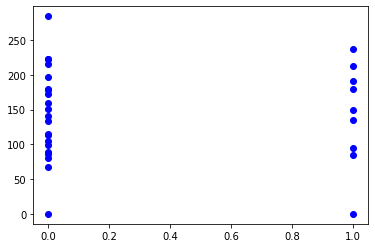

In [188]:
plt.plot(df_hg['HypoSymptoms'], df_hg['PreBreakfast'], 'bo')
plt.show

In [205]:
X = pd.DataFrame(df_hg.loc[:,'PreBreakfast':'PreSnack'])
y = pd.DataFrame(df_hg.loc[:,'HypoSymptoms'])

#Default size of trainData = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33)

In [206]:
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)
print (accuracy_score(y_expect, y_pred))

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)
0.8


/home/saul/actividad1_aprendizaje/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [211]:
X = pd.DataFrame(df_hg3.loc[:,'m1':'m3'])
y = pd.DataFrame(df_hg3.loc[:,'Symptoms'])

#Default size of trainData = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .50)

In [212]:
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)
print (accuracy_score(y_expect, y_pred))

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)
0.9


/home/saul/actividad1_aprendizaje/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
